In [13]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from autocrop import crop
import cv2
from get_data import get_data_array

Importing images and titles ('class') into arrays

In [14]:
def create_dataset(img_folder):
    """
    img_folder is the directory.
    Imports images that are in files with similar types ie the img_folder contains folders with images in folders of the same input copy
    """ 

    df = pd.DataFrame(columns=['Image', 'Copy number']) #load images into dataframe
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)): #images are stored in directories of input copy numbers
            image_path= os.path.join(img_folder, dir1,  file)
            image= crop(image_path) #apply cropping and contrasting 
            image = image.astype('int') # 8 bit image, intensties are whole numbers ie ints
            df = df.append({'Image': image, 'Copy number':dir1}, ignore_index=True) #populating columns of dataframe
    return df# extract the image array and class name

In [32]:
data =create_dataset(r'../dataset/AC') #calling function to make datasets

In [33]:
array = data.to_numpy() #verifing shape and structure of array
array

array([[array([[10, 10, 10, ...,  5,  5,  5],
               [ 9,  9,  9, ...,  4,  4,  4],
               [ 9,  9,  9, ...,  4,  4,  4],
               ...,
               [ 2,  2,  1, ...,  6,  6,  6],
               [ 2,  2,  2, ...,  6,  6,  6],
               [ 2,  2,  2, ...,  6,  6,  6]]), '100'],
       [array([[6, 7, 7, ..., 5, 5, 5],
               [6, 7, 7, ..., 5, 5, 4],
               [7, 7, 7, ..., 4, 4, 4],
               ...,
               [1, 1, 1, ..., 4, 5, 5],
               [1, 1, 1, ..., 5, 5, 5],
               [1, 1, 1, ..., 5, 5, 6]]), '100'],
       [array([[9, 9, 9, ..., 5, 5, 5],
               [8, 8, 8, ..., 5, 5, 5],
               [9, 9, 9, ..., 5, 5, 5],
               ...,
               [1, 1, 1, ..., 9, 9, 9],
               [1, 1, 1, ..., 8, 9, 9],
               [1, 1, 1, ..., 8, 8, 9]]), '1000'],
       [array([[7, 7, 8, ..., 2, 2, 2],
               [7, 6, 7, ..., 2, 2, 2],
               [6, 6, 6, ..., 2, 2, 2],
               ...,
             

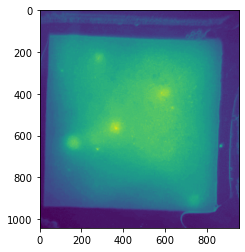

In [34]:
plt.imshow(array[0][0]) #intexting the first image, array[i][j]-> i is the number of arrays in range of number of images,
                        # j=0 is eelecting image array, j=1 is the input copy number 

In [35]:
np.save('QIAML_Data_AC', array) #saving to .npy file, unresolved str issues with pd.to_csv

In [36]:
array2 = np.load('QIAML_Data_AC.npy', allow_pickle=True) #validating save by reloading array

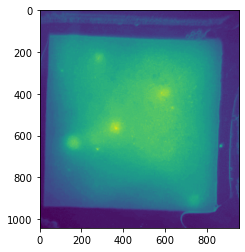

In [37]:
plt.imshow(array2[0][0]) #validating save by reloading array

                                               Images Copy number
0   [[10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,...         100
1   [[6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,...         100
2   [[9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,...        1000
3   [[7, 7, 8, 8, 8, 7, 7, 7, 8, 8, 7, 6, 6, 6, 6,...        1000
4   [[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,...       10000
5   [[7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 6, 6,...       10000
6   [[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8,...          30
7   [[12, 12, 12, 12, 13, 13, 14, 14, 14, 13, 13, ...          30
8   [[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,...         300
9   [[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,...         300
10  [[12, 12, 12, 11, 11, 9, 8, 8, 8, 8, 10, 11, 1...        3000
11  [[4, 4, 4, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 5,...        3000


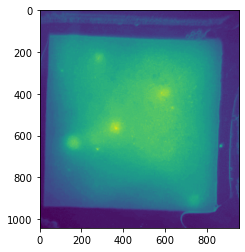

In [38]:
df3 = pd.DataFrame(np.load('QIAML_Data_AC.npy',allow_pickle=True), columns = ['Images', 'Copy number'])
print (df3) #displaying dataset in dataframe that is easier to read
plt.imshow(df3.iloc[0,0])

All and A datasets are too large to upload to github, so spllitting these sets and recombining them is needed, a seperate .py file that will be imported will combine these datasets and convert the arrays to dataframes-in progress

In [39]:
All_1, All_2 = np.array_split(array, 2)#splitting in half
All_2

array([[array([[8, 8, 8, ..., 0, 0, 0],
               [8, 8, 8, ..., 0, 0, 0],
               [8, 8, 8, ..., 0, 0, 0],
               ...,
               [1, 1, 1, ..., 7, 7, 7],
               [1, 1, 1, ..., 7, 7, 7],
               [1, 1, 1, ..., 7, 7, 7]]), '30'],
       [array([[12, 12, 12, ...,  4,  4,  4],
               [12, 12, 12, ...,  3,  4,  4],
               [12, 12, 12, ...,  2,  4,  4],
               ...,
               [ 1,  1,  1, ...,  8,  8,  8],
               [ 1,  1,  1, ...,  9,  8,  8],
               [ 1,  1,  1, ...,  9,  8,  8]]), '30'],
       [array([[ 8,  8,  8, ...,  8,  9,  9],
               [ 9,  9,  8, ...,  8,  9,  8],
               [ 8,  8,  8, ...,  8,  9,  9],
               ...,
               [ 1,  1,  1, ...,  9, 11, 11],
               [ 1,  1,  1, ..., 10, 11, 11],
               [ 1,  1,  1, ..., 12,  9, 10]]), '300'],
       [array([[5, 5, 5, ..., 1, 1, 1],
               [5, 5, 5, ..., 1, 1, 1],
               [5, 5, 5, ..., 1, 1, 1],


In [40]:
Concat = np.concatenate((All_1, All_2), axis=0)
Concat #verifiing the dataset goes back together as expected

array([[array([[10, 10, 10, ...,  5,  5,  5],
               [ 9,  9,  9, ...,  4,  4,  4],
               [ 9,  9,  9, ...,  4,  4,  4],
               ...,
               [ 2,  2,  1, ...,  6,  6,  6],
               [ 2,  2,  2, ...,  6,  6,  6],
               [ 2,  2,  2, ...,  6,  6,  6]]), '100'],
       [array([[6, 7, 7, ..., 5, 5, 5],
               [6, 7, 7, ..., 5, 5, 4],
               [7, 7, 7, ..., 4, 4, 4],
               ...,
               [1, 1, 1, ..., 4, 5, 5],
               [1, 1, 1, ..., 5, 5, 5],
               [1, 1, 1, ..., 5, 5, 6]]), '100'],
       [array([[9, 9, 9, ..., 5, 5, 5],
               [8, 8, 8, ..., 5, 5, 5],
               [9, 9, 9, ..., 5, 5, 5],
               ...,
               [1, 1, 1, ..., 9, 9, 9],
               [1, 1, 1, ..., 8, 9, 9],
               [1, 1, 1, ..., 8, 8, 9]]), '1000'],
       [array([[7, 7, 8, ..., 2, 2, 2],
               [7, 6, 7, ..., 2, 2, 2],
               [6, 6, 6, ..., 2, 2, 2],
               ...,
             

                                               Images Copy number
0   [[10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,...         100
1   [[6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,...         100
2   [[9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,...        1000
3   [[7, 7, 8, 8, 8, 7, 7, 7, 8, 8, 7, 6, 6, 6, 6,...        1000
4   [[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,...       10000
5   [[7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 6, 6,...       10000
6   [[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8,...          30
7   [[12, 12, 12, 12, 13, 13, 14, 14, 14, 13, 13, ...          30
8   [[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,...         300
9   [[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,...         300
10  [[12, 12, 12, 11, 11, 9, 8, 8, 8, 8, 10, 11, 1...        3000
11  [[4, 4, 4, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 5,...        3000


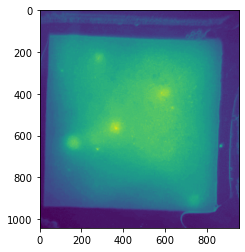

In [41]:
np.save('QIAML_Data_AC_1', All_1) #saving to .npy file, unresolved str issues with pd.to_csv
np.save('QIAML_Data_AC_2', All_2)
array3 = np.load('QIAML_Data_AC_1.npy', allow_pickle=True) #validating save by reloading array
array4 = np.load('QIAML_Data_AC_2.npy', allow_pickle=True) #validating save by reloading array
Concat2 = np.concatenate((All_1, All_2), axis=0)
df4 = pd.DataFrame((Concat2), columns = ['Images', 'Copy number'])
print (df4) #displaying dataset in dataframe that is easier to read
plt.imshow(df4.iloc[0,0])

In [2]:
get_data_array('A')

array([[array([[10, 10, 10, ...,  5,  5,  5],
               [ 9,  9,  9, ...,  4,  4,  4],
               [ 9,  9,  9, ...,  4,  4,  4],
               ...,
               [ 2,  2,  1, ...,  6,  6,  6],
               [ 2,  2,  2, ...,  6,  6,  6],
               [ 2,  2,  2, ...,  6,  6,  6]]), '100'],
       [array([[9, 9, 9, ..., 5, 5, 5],
               [8, 8, 8, ..., 5, 5, 5],
               [9, 9, 9, ..., 5, 5, 5],
               ...,
               [1, 1, 1, ..., 9, 9, 9],
               [1, 1, 1, ..., 8, 9, 9],
               [1, 1, 1, ..., 8, 8, 9]]), '1000'],
       [array([[6, 6, 6, ..., 0, 0, 0],
               [6, 6, 6, ..., 0, 0, 0],
               [6, 6, 6, ..., 0, 0, 0],
               ...,
               [1, 1, 1, ..., 6, 6, 6],
               [1, 1, 1, ..., 6, 6, 5],
               [1, 1, 1, ..., 5, 5, 5]]), '10000'],
       [array([[6, 6, 7, ..., 4, 4, 4],
               [6, 6, 6, ..., 4, 4, 4],
               [5, 6, 6, ..., 5, 5, 4],
               ...,
           

___
# Unresolved str error in pd.df.to_csv


Putting data into dataframe to make CSV and make it distribuatable

In [141]:
data.to_csv('QIAML_All_Data.csv', index=False, compression=None)

Below this point, these cells need IJ not K data sets to work

In [142]:
df2 = pd.read_csv('QIAML_All_Data.csv')
df2 = df2.replace(r'\n',' ', regex=True) 
df2

,Image,Copy number
0,[[10 10 10 ... 5 5 5] [ 9 9 9 ... 4 4 ...,100
1,[[6 6 6 ... 6 6 6] [6 6 6 ... 6 6 6] [6 6 6 ...,100
2,[[6 7 7 ... 5 5 5] [6 7 7 ... 5 5 4] [7 7 7 ...,100
3,[[9 9 9 ... 5 5 5] [8 8 8 ... 5 5 5] [9 9 9 ...,1000
4,[[11 11 11 ... 2 2 2] [11 11 11 ... 2 2 ...,1000
5,[[7 7 8 ... 2 2 2] [7 6 7 ... 2 2 2] [6 6 6 ...,1000
6,[[6 6 6 ... 0 0 0] [6 6 6 ... 0 0 0] [6 6 6 ...,10000
7,[[ 4 4 5 ... 12 12 12] [ 4 4 5 ... 11 12 ...,10000
8,[[7 7 7 ... 2 1 1] [8 7 7 ... 2 1 1] [8 7 7 ...,10000
9,[[6 6 7 ... 4 4 4] [6 6 6 ... 4 4 4] [5 6 6 ...,100000


In [152]:
print(df2.dtypes)
print(np.asarray(df2.iloc[0,0]))

Image          object
Copy number     int64
dtype: object
[[10 10 10 ...  5  5  5]  [ 9  9  9 ...  4  4  4]  [ 9  9  9 ...  4  4  4]  ...  [ 2  2  1 ...  6  6  6]  [ 2  2  2 ...  6  6  6]  [ 2  2  2 ...  6  6  6]]


TypeError: Image data of dtype <U155 cannot be converted to float

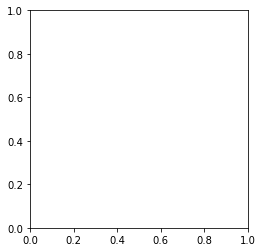

In [153]:
plt.imshow(np.asarray(df2.iloc[0,0]))